In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
points_df = pd.read_csv('./datapoints.csv')
points_df

,x,y
0,0.000000,0.496714
1,0.052632,0.019630
2,0.105263,0.963478
3,0.157895,1.996714
4,0.210526,0.397426
5,0.263158,0.555337
6,0.315789,2.526581
7,0.368421,1.872698
8,0.421053,0.793684
9,0.473684,1.963613


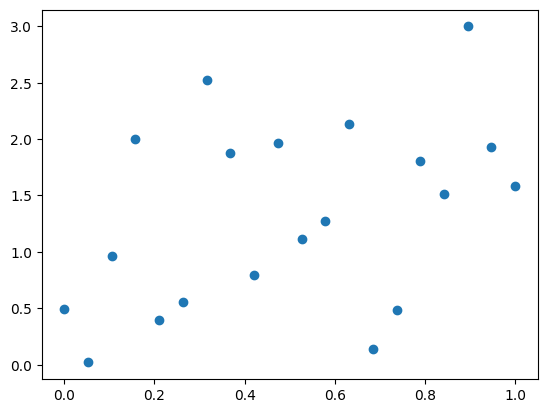

In [6]:
plt.scatter(points_df.x,points_df.y)

In [7]:
def mse(predicted, true):
    n = len(true)
    return (1/n)*((predicted - true)**2).sum()

In [8]:
a = 10
b = -2
a, b

(10, -2)

In [9]:
y_pred = a * points_df.x + b
y_pred.name = 'y'

In [10]:
error = mse(y_pred,points_df.y)
error

10.621305173303698

In [11]:
pred_df = points_df.copy()
pred_df.drop(['y'], axis=1, inplace=True)
pred_df = pd.concat([pred_df,y_pred],axis=1)
pred_df

,x,y
0,0.000000,-2.000000
1,0.052632,-1.473684
2,0.105263,-0.947368
3,0.157895,-0.421053
4,0.210526,0.105263
5,0.263158,0.631579
6,0.315789,1.157895
7,0.368421,1.684211
8,0.421053,2.210526
9,0.473684,2.736842


In [12]:
epoch = 0

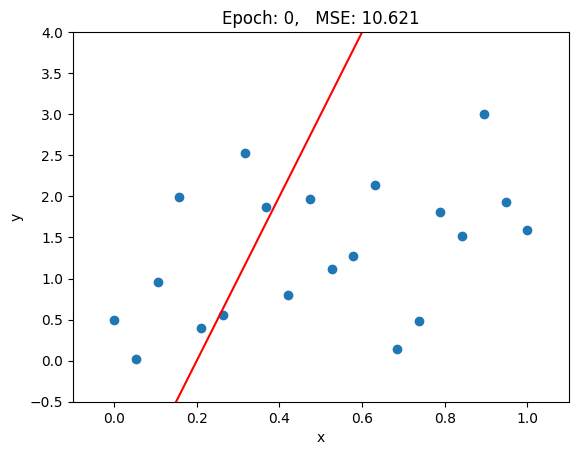

In [13]:
xmin = -0.1
xmax = 1.1
ymin = -0.5
ymax = 4

plt.axis((xmin, xmax, ymin, ymax))
plt.title(label=f'Epoch: {epoch},   MSE: {round(error,3)}')
sns.lineplot(x=pred_df.x, y=pred_df.y, color='red')
plt.scatter(points_df.x,points_df.y)

In [14]:
mse(pred_df.y, points_df.y)

10.621305173303698

The `error function` is given by the MSE function. To minimize the error we need to calculate the gradient of the loss function with respect to the `slope` (aka `a`) and the `intercept` (aka `b`):

$$
\nabla MSE = \frac{\partial MSE}{\partial a} , \frac{\partial MSE}{\partial b} <=>
$$
$$
\frac{\partial MSE}{\partial a} = \frac{1}{n} \frac{\partial (yy - y)^2}{\partial a} = \frac{1}{n} 2(yy - y) * \frac{\partial (yy - y)}{\partial a}
$$
$$
= \frac{1}{n} 2(yy - y) * \frac{\partial (a x + b - y)}{\partial a}
$$
$$
= \frac{1}{n} 2(yy - y) * ( \frac{\partial (a x)}{\partial a} + \frac{\partial (b - y)}{\partial a} )
$$
$$
= \frac{1}{n} 2(yy - y) * x

Respectively  

$$
\frac{\partial MSE}{\partial b} = \frac{1}{n} 2(yy - y)

In [15]:
def dmse_da(x, predicted, true):
    n = len(true)
    return (2/n)*((predicted - true) * x).sum()

def dmse_db(predicted, true):
    n = len(true)
    return (2/n)*(predicted - true).sum()

ALGORITHM:  

For each `epoch`  
+ Calculate the predictions,  
+ Calculate error wrt `a` and `b`,  
+ Update `a` and `b`,  
+ Print `error`  

In [16]:
def fit(epochs, x, y, ytrue, lr):
    history = []
    params = []
    a = 10
    b = -2
    for epoch in range(epochs):
        y = a * x + b
        error = mse(y, ytrue)
        a -= dmse_da(x, y, ytrue) * lr
        b -= dmse_db(y, ytrue) * lr
        history.append((epoch, error))
        params.append((a,b))
    return params, history

In [17]:
dmse_da(points_df.x, pred_df.y, points_df.y)

3.3092488964548057

In [18]:
dmse_db(pred_df.y, points_df.y)

3.3425971228836575

In [19]:
params, history = fit(200,points_df.x,pred_df.y,points_df.y,0.1)

In [20]:
def graph_plot(epoch):
    a,b = params[epoch]
    epoch, error = history[epoch]
    y_pred = a * pred_df.x + b
    plt.axis((xmin, xmax, ymin, ymax))
    plt.title(label=f'Epoch: {epoch+1:3},   MSE: {round(error,3):.3f}')
    sns.lineplot(x=pred_df.x, y=y_pred, color='red')
    plt.scatter(points_df.x,points_df.y)

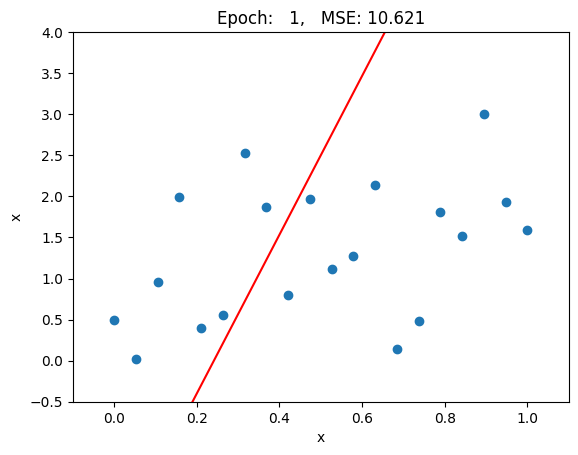

In [21]:
graph_plot(0)

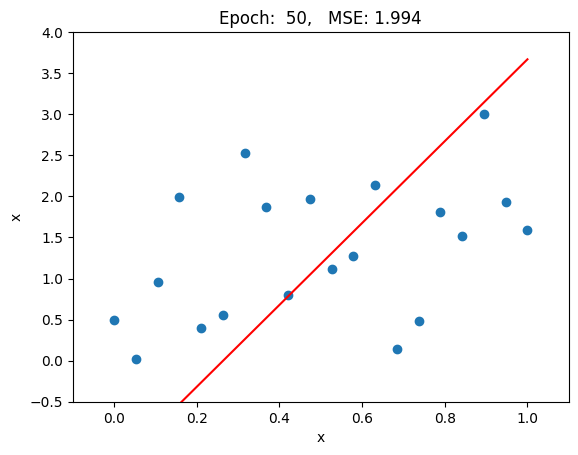

In [22]:
graph_plot(49)

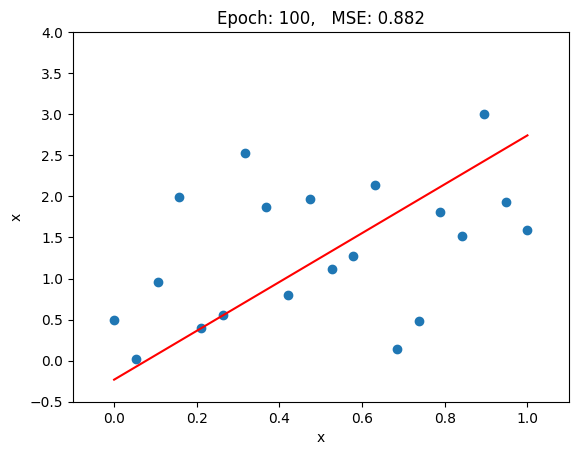

In [23]:
graph_plot(99)

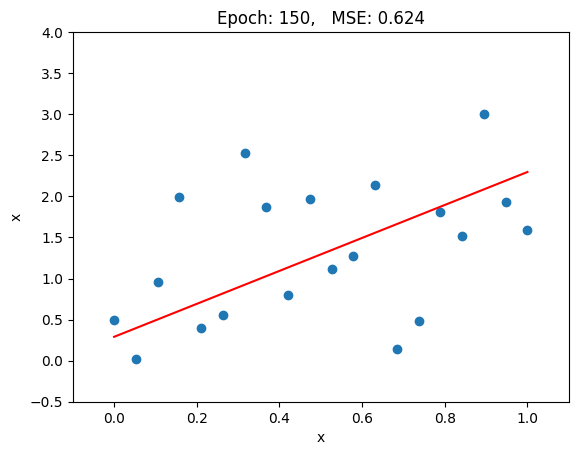

In [24]:
graph_plot(149)

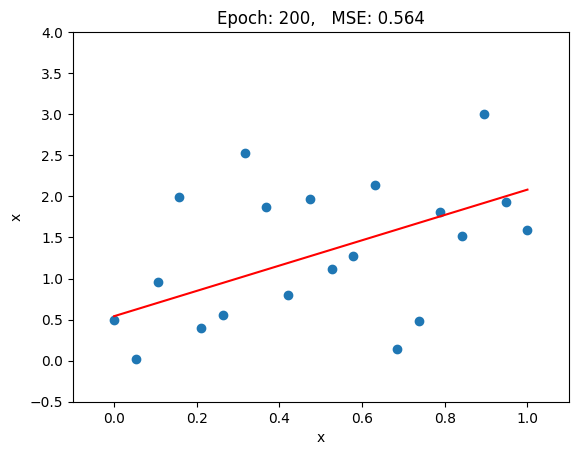

In [25]:
graph_plot(199)

In [43]:
def graph_save(epoch,path):
    a,b = params[epoch]
    epoch, error = history[epoch]
    y_pred = a * pred_df.x + b
    plt.axis((xmin, xmax, ymin, ymax))
    plt.title(label=f'Epoch: {epoch+1:3},   MSE: {round(error,3):.3f}')
    sns.lineplot(x=pred_df.x, y=y_pred, color='red')
    plt.scatter(points_df.x,points_df.y)
    fig = plt.savefig(path + str(epoch))
    plt.close(fig)

In [44]:
for epoch in range(200):
    graph_save(epoch, './img/')

In [45]:
import imageio

In [46]:
images = []

for i in range(200):
    filename = './img/{}.png'.format(i)
    images.append(imageio.v2.imread(filename))

imageio.mimsave('output.gif', images, fps=15)

![SegmentLocal](./output.gif "segment")